In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.preprocessing import OrdinalEncoder

In [30]:
!gdown 1xwJmYJxEia06sxUdJyGO7JFx4DNK1fbp

Downloading...
From: https://drive.google.com/uc?id=1xwJmYJxEia06sxUdJyGO7JFx4DNK1fbp
To: /content/Problem3.csv
100% 37.4k/37.4k [00:00<00:00, 48.4MB/s]


In [31]:
data_path = 'Problem3.csv'
df = pd.read_csv(data_path)
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,4.468204,26.2,94.3,1.808289,8.2,51,6.7,False,0.0
1,7,4,oct,tue,4.517431,35.4,669.1,2.041220,18.0,33,0.9,False,0.0
2,7,4,oct,sat,4.517431,43.7,686.9,2.041220,14.6,33,1.3,False,0.0
3,8,6,mar,fri,4.529368,33.3,77.5,2.302585,8.3,97,4.0,True,0.0
4,8,6,mar,sun,4.503137,51.3,102.2,2.360854,11.4,99,1.8,False,0.0


In [32]:
type(df['month'][0]), type(df['rain'][0])

(str, numpy.bool_)

In [33]:
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()
categorical_cols

['month', 'day', 'rain']

In [34]:
ordinal_encoder = OrdinalEncoder()
for col in categorical_cols:
  #print unique category
  print(col, df[col].unique())

month ['mar' 'oct' 'aug' 'sep' 'apr' 'jun' 'jul' 'feb' 'jan' 'dec' 'may' 'nov']
day ['fri' 'tue' 'sat' 'sun' 'mon' 'wed' 'thu']
rain [False  True]


In [35]:
df[categorical_cols] = ordinal_encoder.fit_transform(df[categorical_cols])
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,7.0,0.0,4.468204,26.2,94.3,1.808289,8.2,51,6.7,0.0,0.0
1,7,4,10.0,5.0,4.517431,35.4,669.1,2.041220,18.0,33,0.9,0.0,0.0
2,7,4,10.0,2.0,4.517431,43.7,686.9,2.041220,14.6,33,1.3,0.0,0.0
3,8,6,7.0,0.0,4.529368,33.3,77.5,2.302585,8.3,97,4.0,1.0,0.0
4,8,6,7.0,3.0,4.503137,51.3,102.2,2.360854,11.4,99,1.8,0.0,0.0


In [36]:
X = df.drop('rain', axis=1)
y = df['rain']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=7
)

In [38]:
xg_model = xgb.XGBRegressor(
    n_estimators=102,
    learning_rate=0.01,
    max_depth=3,
    seed=7
)
xg_model.fit(X_train, y_train)
y_pred = xg_model.predict(X_test)

In [39]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'MSE: {mse}, MAE: {mae}')

MSE: 0.019071412113839628, MAE: 0.025916787695285735


In [40]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [41]:
!gdown 1pVdH-2b_odeuEPdXbLQYDcHXxgqqBK4i

Downloading...
From: https://drive.google.com/uc?id=1pVdH-2b_odeuEPdXbLQYDcHXxgqqBK4i
To: /content/Problem4.csv
100% 12.3k/12.3k [00:00<00:00, 26.0MB/s]


In [42]:
df = pd.read_csv('Problem4.csv')
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [43]:
X, y = df.drop('Target', axis=1), df['Target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y , test_size=0.3, random_state=7
)

In [44]:
xg_class = xgb.XGBClassifier(
    seed=7
)
xg_class.fit(X_train, y_train)
y_pred = xg_class.predict(X_test)

In [45]:
train_acc = accuracy_score(y_train, xg_class.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)
print(f'Train Accuracy: {train_acc}, Test Accuracy: {test_acc}')

Train Accuracy: 1.0, Test Accuracy: 0.9629629629629629


In [47]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [48]:
!gdown 1ZJkoYmYBjUEcTPnW00gMfiJ9cTltb-II
!gdown 1PPZ0IPpVIWymL1tf0YEud2fuJGK-0FVI

Downloading...
From: https://drive.google.com/uc?id=1ZJkoYmYBjUEcTPnW00gMfiJ9cTltb-II
To: /content/FordA_TEST.tsv
100% 7.36M/7.36M [00:00<00:00, 59.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1PPZ0IPpVIWymL1tf0YEud2fuJGK-0FVI
To: /content/FordA_TRAIN.tsv
100% 20.1M/20.1M [00:00<00:00, 32.2MB/s]


In [84]:
def process_tsv(filename):
  data = np.loadtxt(filename, delimiter='\t')
  X, y = data[:, 1:], data[:, 0].astype(int)
  return X, y

x_train, y_train = process_tsv('FordA_TRAIN.tsv')
x_test, y_test = process_tsv('FordA_TEST.tsv')

In [85]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3601, 500), (3601,), (1320, 500), (1320,))

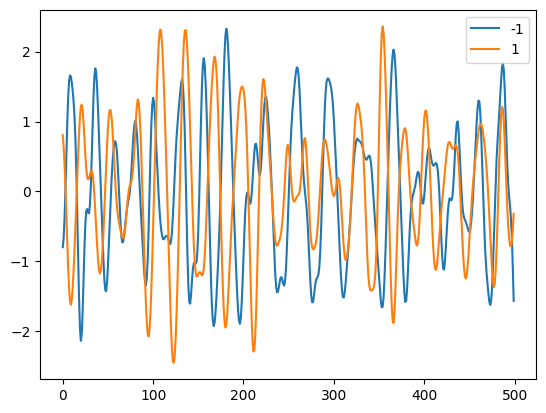

In [86]:
classes = np.unique(y_train)
plt.figure()
for cls in classes:
  x = x_train[y_train == cls]
  plt.plot(x[0], label=cls)
plt.legend(loc='best')
plt.show()
plt.close()

In [87]:
y_train[y_train == -1] = 0
y_test[y_test == -1] = 0

In [89]:
# scale = StandardScaler()
# x_train = scale.fit_transform(x_train)
# x_test = scale.transform(x_test)

In [90]:
model = xgb.XGBClassifier(
    n_estimators = 200,
    random_state = 42
)
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [91]:
y_pred = model.predict(x_test)

print("confusion matrix")
print(confusion_matrix(y_test, y_pred))

print("classification report")
print(classification_report(y_test, y_pred))

confusion matrix
[[550 131]
 [139 500]]
classification report
              precision    recall  f1-score   support

           0       0.80      0.81      0.80       681
           1       0.79      0.78      0.79       639

    accuracy                           0.80      1320
   macro avg       0.80      0.80      0.80      1320
weighted avg       0.80      0.80      0.80      1320



In [92]:
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc}')

Accuracy: 0.7954545454545454
